In [1]:
from collections import Counter

import matplotlib.pyplot as plt
import torchvision.datasets as datasets
from torchvision import transforms

# Load the EuroSAT dataset
transform = transforms.Compose(
    [
        transforms.ToTensor(),
    ]
)
dataset = datasets.EuroSAT(root="data", download=True, transform=transform)

In [2]:
# Visualize the distribution of the dataset
def visualize_distribution(dataset):
    labels = [dataset[i][1] for i in range(len(dataset))]
    label_counts = Counter(labels)
    plt.bar(label_counts.keys(), label_counts.values())
    plt.xticks(list(label_counts.keys()), dataset.classes, rotation=90)
    plt.xlabel("Classes")
    plt.ylabel("Number of samples")
    plt.title("Distribution of the EuroSAT dataset")
    plt.show()

    return label_counts

# Visualize one sample from each class
def visualize_samples(dataset, label_counts):
    label_counts = dict(sorted(label_counts.items()))
    indices = []
    cumulative_sum = 0
    for count in label_counts.values():
        cumulative_sum += count
        indices.append(cumulative_sum)
    # Visualize the last sample of each class
    indices = [x - 1 for x in indices]
    
    plt.figure(figsize=(20, 10))
    for i in range(len(indices)):
        plt.subplot(3, 5, i + 1)
        plt.imshow(dataset[indices[i]][0].permute(1, 2, 0))
        plt.title(f"{dataset.classes[dataset[indices[i]][1]]}")
        plt.axis("off")
    plt.show()

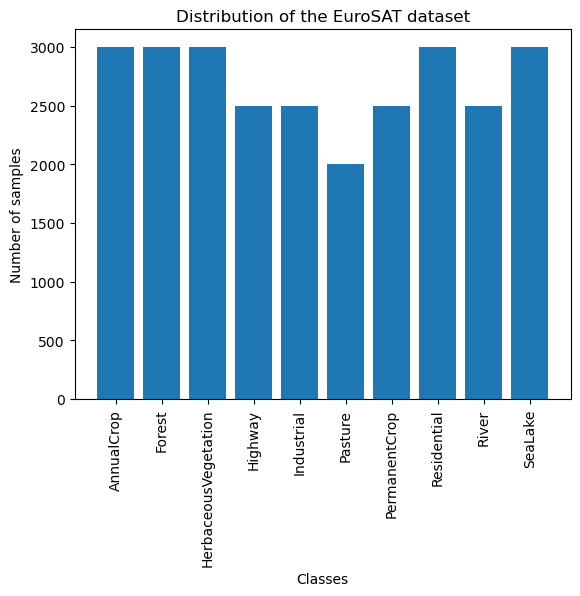

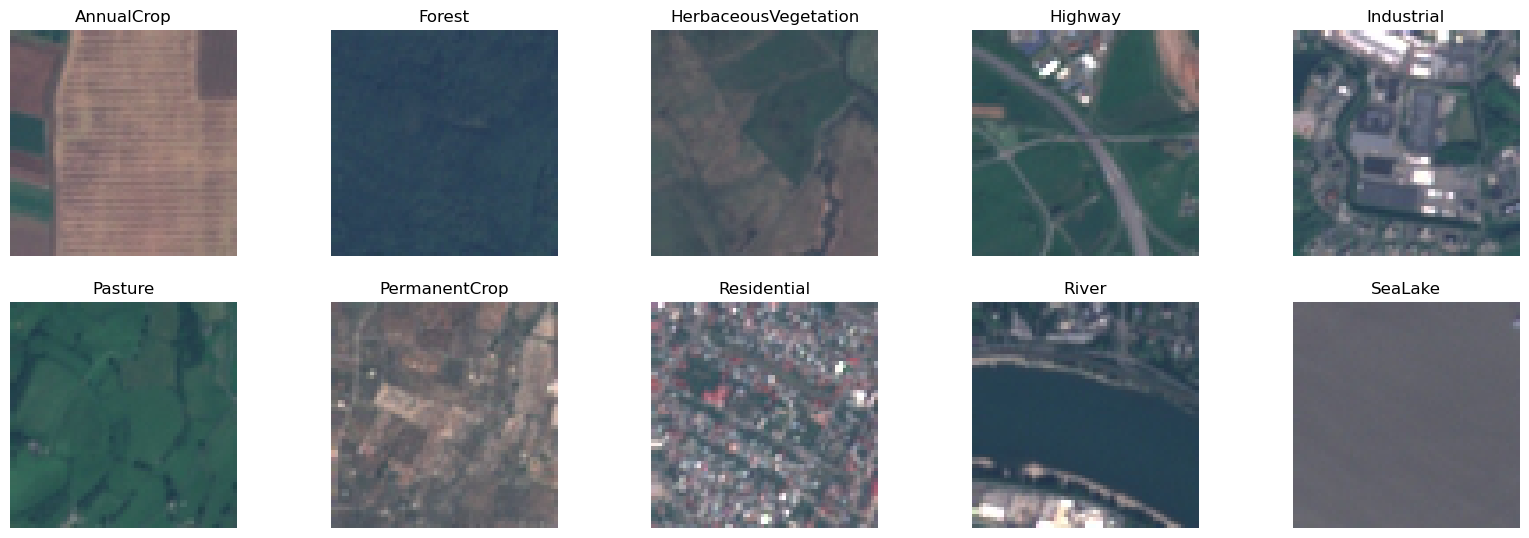

In [3]:
label_counts = visualize_distribution(dataset)

visualize_samples(dataset, label_counts)
